# Project 3

This project is going to deal with the [*Chebyshev Equation*](https://en.wikipedia.org/wiki/Chebyshev_equation):

$$
(1-t^2)x''(t) - tx'(t) + \alpha^2 x(t) = 0.
$$

From the theory we learned in class, we know that we can expand this as a power series centered at 
$t_0 = 0$ on (at least) the interval $(-1,1)$. That is, we can write the general solution as: 
$$
x(t) = \sum_{k=0}^{\infty}a_kt^{k},
$$
where the coefficients $a_0,a_1$ are arbitrary and satisfy $x(0)=a_0$ and $x'(0)=a_1$. 

The first part of the project is to determine the recurance relation that the coefficients satisfy. Do that
and write your answer below. (No need to use complete sentences -- just make sure the right hand side is 
what it should be). 

The recurance relation that the coefficients satisfiy is (click in this cell and press Enter to be able to 
edit this cell): 
$$
a_{k+2} = \frac{(k - 𝛼)(k + 𝛼)}{(k + 1)(k + 2)}a_{k}.
$$

We can also write this as: 

$$
a_{k} = \frac{(k - 2)^2 - 𝛼^2}{(k - 1)(k)}a_{k-2}.
$$

Below, write a function that returns $a_{k}$ given $a_{k-2}$. Below, the parameter ```a``` is for $\alpha$. 
Only edit the parts that say ```#Put something here```.

In [2]:
from sympy import *
from numpy import *

def A(k, a, a0, a1):
    #Put your code below here. I've given you a head start: 
    
    if k == 0: 
        return a0  # x(0) = a0
    
    if k == 1:
        return a1  # x'(0) = a1
    
    return (((k - 2)**2 - a**2) / ((k-1)*(k)))*A(k-2, a, a0, a1) # From equation above


Your answer above should have the parameter $\alpha^2$ in it (if it doesn't - go back and see where you made 
a mistake.) There are two observations. First, the even indexed coeffcients depend only on the previous indexed 
coeffcients (e.g. $a_4$ depends on $a_2$ and implcitly $a_0$ but is independent of $a_1$ and $a_3$). 
Similarly, the odd indexed coefficients depend only on the previous odd indexed coefficients. Thus, we can 
write the power series for $x$ as: 
$$
x(t) = \sum_{n=0}^{\infty}a_{2n}t^{2n} + \sum_{n=0}^{\infty}a_{2n+1}t^{2n+1}
=: x_{E}(t) + x_{O}(t), 
$$
where:
$$
x_{E}(t) := \sum_{n=0}^{\infty}a_{2n}t^{2n} 
\hspace{.5in}
\hspace{.5in} 
x_{O}(t) := \sum_{n=0}^{\infty}a_{2n+1}t^{2n+1}.
$$

For some values of $\alpha$, $x_{E}(t)$ will be a polynomial. For some values of $\alpha$, $x_{O}(t)$ will be 
a polynomial. Determine these values of $\alpha$ and the degree of the polynomial. 

When $\alpha$ is (**EVEN**) then $x_{E}(t)$ is a polynomial of degree (**2n**). 

When $\alpha$ is (**ODD**) then $x_{O}(t)$ is a polynomial of degree (**2n + 1**). 

For the rest of the project, we are going to set $\alpha = 3$. We will solve the initial value problem: 
$$
(1-t^2)x''(t) - tx'(t) + 9x(t) = 0, 
\hspace{,5in}
x(0) = x_0, 
\hspace{.25in}
x'(t) = x_0'
$$
using series solutions. Actually, in general, the solution is a series and we will just take a finite number 
of terms in the series - in other words, we are approximating the solution with its Taylor polynomial. 

Let $P_{N}(t)$ be the $n$ degree taylor polynomial for the solution to the IVP: 
$$
(1-t^2)x''(t) - tx'(t) + 9x(t) = 0, 
\hspace{,5in}
x(0) = 1, 
\hspace{.25in}
x'(t) = 1.
$$
(That is, $P_{N}(t) = \sum_{k=0}^{N}a_kt^k$). Below, plot $P_{3}(t)$ and $P_{4}(t)$. 

In [3]:
import numpy as np 
import matplotlib.pyplot as plt

# The T vector represents the horizontal axis; the h value is the the distance betwen t values. 
# We want to plot the solution on (-1,1) with an h value of .01. Pick the correct parameters to 
# put in the np.arange() function
h = .01
T = np.arange(-1, 1+h, h)
    
#P3 is the third degree Taylor polynomial. 
P3 =  A(1, 3, 1, 1)*T + A(3, 3, 1, 1)*T**3 

#P4 is the fourth degree Taylor polynomial. 
P4 =  A(0, 3, 1, 1) + A(2, 3, 1, 1)*T**2 + A(4, 3, 1, 1)*T**4
    
plt.figure()
plt.title('Taylor Approximations')
plt.plot(T, P3)
plt.plot(T, P4)

Next, consider the IVP: 
$$
(1-t^2)x''(t) - tx'(t) + 9x(t) = 0, 
\hspace{,5in}
x(0) = 0, 
\hspace{.25in}
x'(t) = 1.
$$

It turns out that the solution is a polynomial. Below, plot the solution. Your expression for ```P``` should 
only include the terms that are relevant (e.g. if the solution is a tenth degree polynomial with only the even 
terms, your expression shouldn't have the odd terms or any terms after the tenth.)

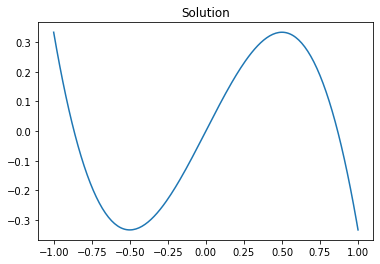

In [33]:
# The T vector represents the horizontal axis; the h value is the the distance betwen t values. 
# We want to plot the solution on (-1,1) with an h value of .01. Pick the correct parameters to 
# put in the np.arange() function
h = .01
T = np.arange(-1, 1+h, h)
    
#P is the solution 
# The degree of the polynomial P is 3 because the a is specified to be 3
# Since x(0) = 0 we know that the polynomial here is an odd degree 
P = A(1, 3, 0, 1)*T + A(3, 3, 0, 1)*T**3 # do not include the even terms in this since they have no influence on graph

plt.figure()
plt.title('Solution')
plt.plot(T, P)

# Grading 
There are $10$ different places for you to write something. Each one is 5 points. It will be graded as: 
1. Correctness (is correct output produced / is the answer correct?) - 4 pts 
2. Is the fomat correct (i.e. in the lines that say something like ```#your code here``` is the code in the right spot? Also - is that the only part that was modified?) - 1 pt

Note that for the code portions, you may *only* modify the lines that have ```#your code here``` or something
similar. And you code should be on that one line. Let me know if you have questions about what I mean by 
that. Also, *YOU MUST RUN YOUR CODE*. So I should see your plots from above, etc.

TO TURN IN: Click File -> Download as -> PDF via LaTeX (.pdf). If there is a problem, it is probably because 
the way you typed in your answers for the "YOUR NUMERATOR HERE" or "YOUR DENOMINATOR HERE" parts. Or the part 
where you determine which series is a polynomial based on $\alpha$. Please try to fix that. If you can't then 
you can do File -> Download as -> HTML (.html). *And then print that as a pdf from your browser* and turn that in.